In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import pandas as pd
from datetime import datetime
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


/home/rodrigo/ENV/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Importo el set de entrenamiento

In [2]:
data_set_complete = pd.read_csv('/home/rodrigo/ENV/Notebooks/Tp2/Datos-Tp2/Csvs/data_set_complete.csv', parse_dates=['fechapostulacion', 'ultima_vista'], dtype={'sepostulo':'int8', 'idaviso':'int64', 'idpostulante':'object', 'veces_visto':'int16', 'estudios':'category', 'estado':'category', 'edad':'int8', 'sexo':'category','nombre_zona':'category', 'tipo_de_trabajo':'category', 'nivel_laboral':'category', 'nombre_area':'category'})
data_set_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208286 entries, 0 to 13208285
Data columns (total 16 columns):
sepostulo               int8
idaviso                 int64
idpostulante            object
fechapostulacion        datetime64[ns]
ultima_vista            datetime64[ns]
veces_visto             int16
estudios                category
estado                  category
sexo                    category
edad                    int8
titulo                  object
nombre_zona             category
tipo_de_trabajo         category
nivel_laboral           category
nombre_area             category
denominacion_empresa    object
dtypes: category(7), datetime64[ns](2), int16(1), int64(1), int8(2), object(3)
memory usage: 755.8+ MB


## Encoders

In [3]:
def df_encode_categorical_vars(df):
    for column in df.columns:
        if (df[column].dtype.name == 'category'):
            le = preprocessing.LabelEncoder()
            df[column] = le.fit_transform(df[column].astype(str))

In [4]:
def df_encode_object_vars(df):
    for column in df.columns:
        if (df[column].dtype == type(object)):
            le = preprocessing.LabelEncoder()
            df[column] = le.fit_transform(df[column].astype(str))

## Para trabajr solo me voy a cadar con una muestra del set de entrenamiento

In [5]:
muestra = data_set_complete.sample(500000)

In [6]:
muestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 8388141 to 4986737
Data columns (total 16 columns):
sepostulo               500000 non-null int8
idaviso                 500000 non-null int64
idpostulante            500000 non-null object
fechapostulacion        249803 non-null datetime64[ns]
ultima_vista            67497 non-null datetime64[ns]
veces_visto             500000 non-null int16
estudios                492349 non-null category
estado                  492349 non-null category
sexo                    500000 non-null category
edad                    500000 non-null int8
titulo                  468636 non-null object
nombre_zona             468636 non-null category
tipo_de_trabajo         468636 non-null category
nivel_laboral           457414 non-null category
nombre_area             468636 non-null category
denominacion_empresa    468611 non-null object
dtypes: category(7), datetime64[ns](2), int16(1), int64(1), int8(2), object(3)
memory usage: 32.4+ MB


In [7]:
df_encode_categorical_vars(muestra)

In [8]:
muestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 8388141 to 4986737
Data columns (total 16 columns):
sepostulo               500000 non-null int8
idaviso                 500000 non-null int64
idpostulante            500000 non-null object
fechapostulacion        249803 non-null datetime64[ns]
ultima_vista            67497 non-null datetime64[ns]
veces_visto             500000 non-null int16
estudios                500000 non-null int64
estado                  500000 non-null int64
sexo                    500000 non-null int64
edad                    500000 non-null int8
titulo                  468636 non-null object
nombre_zona             500000 non-null int64
tipo_de_trabajo         500000 non-null int64
nivel_laboral           500000 non-null int64
nombre_area             500000 non-null int64
denominacion_empresa    468611 non-null object
dtypes: datetime64[ns](2), int16(1), int64(8), int8(2), object(3)
memory usage: 55.3+ MB


### Saco las variables que no son numericas

In [9]:
muestra.drop(columns=['idaviso','idpostulante','fechapostulacion','ultima_vista','titulo','denominacion_empresa'], inplace=True)

In [10]:
muestra.head()

,sepostulo,veces_visto,estudios,estado,sexo,edad,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area
8388141,0,0,6,2,1,30,6,10,5,181
2961750,1,1,5,0,1,36,6,10,5,181
11856127,0,0,4,2,0,21,5,1,4,29
7702901,0,0,6,2,1,56,5,1,4,138
1044600,1,1,6,2,1,41,5,1,1,4


In [11]:
muestra['sepostulo'].value_counts()

0    250197
1    249803
Name: sepostulo, dtype: int64

## Defino train y test

In [12]:
train_set, test_set, train_classes, test_classes = train_test_split(muestra, muestra['sepostulo'], test_size=0.3)

In [13]:
train_set.drop(columns=['sepostulo'], inplace=True)
test_set.drop(columns=['sepostulo'], inplace=True)
train_classes.drop(columns=['sepostulo'], inplace=True)
test_classes.drop(columns=['sepostulo'], inplace=True)

/home/rodrigo/ENV/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rodrigo/ENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Analicemos el mejor valor de K

In [14]:
# Lista de valores de K impares (1,3,5,7,9..39)
kVals = range(1, 60, 2)
accuracies = []

#En este loop vamos a ver la precision del algoritmo en funcion de K

for k in kVals:
    #Inicializacion del modelo
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_set, train_classes)

    
    score = model.score(test_set, test_classes)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=97.43%
k=3, accuracy=97.39%
k=5, accuracy=97.40%
k=7, accuracy=97.37%
k=9, accuracy=97.31%
k=11, accuracy=97.21%
k=13, accuracy=97.25%
k=15, accuracy=97.16%
k=17, accuracy=97.08%
k=19, accuracy=97.01%
k=21, accuracy=96.89%
k=23, accuracy=96.79%
k=25, accuracy=96.69%
k=27, accuracy=96.61%
k=29, accuracy=96.55%
k=31, accuracy=96.47%
k=33, accuracy=96.44%
k=35, accuracy=96.39%
k=37, accuracy=96.33%
k=39, accuracy=96.25%
k=41, accuracy=96.19%
k=43, accuracy=96.14%
k=45, accuracy=96.09%
k=47, accuracy=96.00%
k=49, accuracy=95.93%
k=51, accuracy=95.86%
k=53, accuracy=95.82%
k=55, accuracy=95.81%
k=57, accuracy=95.72%
k=59, accuracy=95.67%


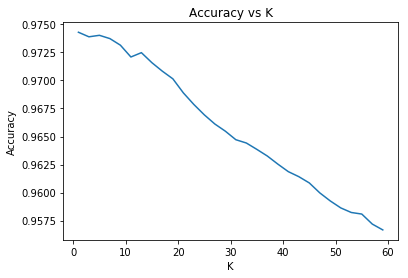

In [15]:
#Grafico la precisión vs el valor de K
plt.plot(kVals, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy vs K')
plt.show()

Pareciera ser que alrededor de k=5 estan los mejores valores
